[INFO] Cargando datos...
[INFO] Separando columnas manualmente...
Vista previa de los datos después de la separación:
         Date Store     Category Units_Sold Unit_Price
0  2024-01-01   101  Electronics         30     299.99
1  2024-01-01   102     Clothing         45      49.99
2  2024-01-01   103   Home Goods         20      19.99
3  2024-01-02   101  Electronics         25     299.99
4  2024-01-02   102     Clothing         50      49.99
[INFO] Iniciando preprocesamiento de datos...
[INFO] Filas duplicadas eliminadas: 55
[INFO] Valores nulos en 'Units_Sold' rellenados con la mediana: 32.0
[INFO] Valores nulos en 'Unit_Price' rellenados con la mediana: 49.99
[INFO] Columna 'Date' convertida a formato datetime.
[INFO] Variables categóricas codificadas con One-Hot Encoding.
[INFO] Nueva columna 'Total_Sales' generada.
[INFO] Preprocesamiento completado con éxito.

Datos después del preprocesamiento:
        Date  Units_Sold  Unit_Price  Store_102  Store_103  \
0 2024-01-01          

c:\Users\mason\Desktop\prueba xpert group\data_project\scripts\data_preproc.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors="coerce")  # Asegurar numérico
c:\Users\mason\Desktop\prueba xpert group\data_project\scripts\data_preproc.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, 

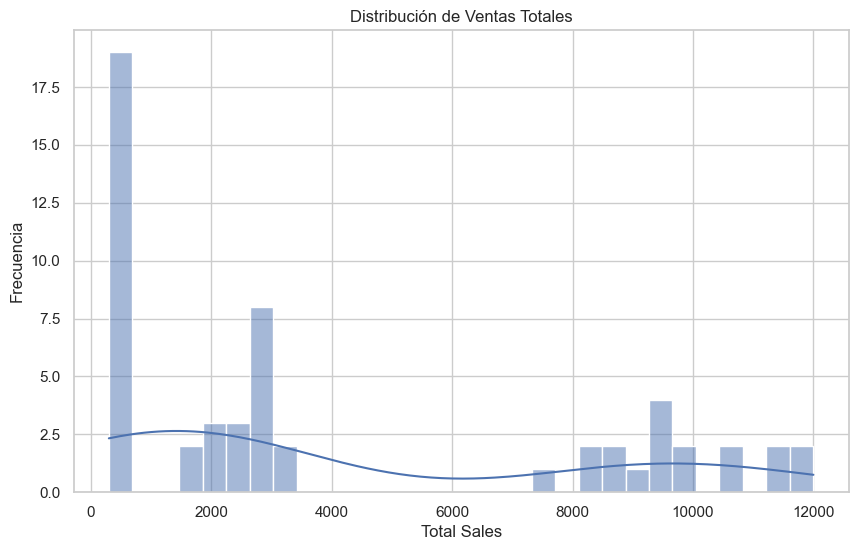

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

# Añadir la carpeta scripts al PYTHONPATH
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Importar la función de preprocesamiento
from scripts.data_preproc import preprocess_data

# Configuración de gráficos
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Ruta al archivo CSV
file_path = "../data/sales_data.csv"

# Cargar y preprocesar los datos
try:
    print("[INFO] Cargando datos...")
    # Cargar el archivo y forzar el delimitador
    data = pd.read_csv(file_path, delimiter=",", encoding="latin1", quotechar='"', engine="python")

    # Verificar si las columnas están unidas
    if len(data.columns) == 1:  # Significa que todo está en una sola columna
        print("[INFO] Separando columnas manualmente...")
        data = data.iloc[:, 0].str.split(",", expand=True)
        data.columns = ["Date", "Store", "Category", "Units_Sold", "Unit_Price"]

    # Vista previa de los datos
    print("Vista previa de los datos después de la separación:")
    print(data.head())

    # Aplicar preprocesamiento
    data_cleaned = preprocess_data(data)

    # Vista previa de los datos después del preprocesamiento
    print("\nDatos después del preprocesamiento:")
    print(data_cleaned.head())

    # Información básica de los datos preprocesados
    print("\nInformación de los datos preprocesados:")
    print(data_cleaned.info())

    # Visualización: Distribución de Total_Sales
    sns.histplot(data_cleaned["Total_Sales"], kde=True, bins=30)
    plt.title("Distribución de Ventas Totales")
    plt.xlabel("Total Sales")
    plt.ylabel("Frecuencia")
    plt.show()

except Exception as e:
    print(f"Error al procesar el archivo: {e}")
